# Project Description
You work in the oil extraction company OilyGiant. Your task is to find the best places to open 200 new oil wells.

To complete this task, you will have to perform the following steps:

- Read the files with the parameters collected from oil wells in the selected region: quality of crude oil and volume of reserves.
- Create a model to predict the volume of reserves in new wells.
- Choose the oil wells that have the highest estimated values.
- Choose the region with the highest total profit for the selected oil wells.

You have data on oil samples from three regions. You already know the parameters for each oil well in the region. Create a model to help choose the region with the highest profit margin. Analyze the potential benefits and risks using the bootstrapping technique.

## Preprocessing the data
First we want to make sure our data is clean and usable for the entire project and analysis.

In [27]:
# We always start by importing all our libraries to use in this project
# Pandas for dataset management
import pandas as pd
# Sklearn for machine learning practices and modelling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
# Plotly for showing the data in dynamic graphics
import matplotlib.pyplot as plt
# Numpy for specific numeric operations
import numpy as np

After all the imports to use on this analysis, we can start by watching our data to start preprocessing it

In [28]:
region_0 = pd.read_csv('./geo_data_0.csv')
region_1 = pd.read_csv('./geo_data_1.csv')
region_2 = pd.read_csv('./geo_data_2.csv')

region_0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


For the next data we do not have a specific description nor title for the "f" columns, we only know they are important parameters, so we will keep them on the analysis

In [29]:
region_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [30]:
region_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [31]:
region_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


This analysis will not need a complicated preprocessing process since there are only numbers to take into consideration. Next we will create a model for each and every region to see which is better to take into consideration.

## Regions Analysis
For this section we will want to have a generic function for the investigation of the three regions, which can calulcate the rmse and the mean of the oil on each region and show the regression track of the three features we have on our dataframe. 

In [ ]:
# We create a function that allows us to get the information of every region by passing the dataframe expected
def calculateRMSE(rg):
    # Select Features and Target
    features = ["f0", "f1", "f2"]
    f = rg[features]   # Feature columns
    t = rg["product"]  # Target column

    # Train/Test Split
    features_train, features_valid, target_train, target_valid = train_test_split(f, t, test_size=0.2, random_state=42)

    # Train Linear Regression Model
    model = LinearRegression()
    model.fit(features_train, target_train)

    # Make Predictions
    predictions_valid = model.predict(features_valid)

    # Plot Multiple Scatter Plots (One for Each Feature)
    plt.figure(figsize=(12, 4))

    for i, feature in enumerate(features):
        plt.subplot(1, 3, i+1)

        # Scatter Plot
        plt.scatter(features_valid[feature], target_valid, color="blue", alpha=0.6, label="Actual Data")
        plt.scatter(features_valid[feature], predictions_valid, color="red", alpha=0.6, label="Predictions")

        # Labels
        plt.xlabel(feature)
        plt.ylabel("Product")
        plt.title(f"Linear Regression: {feature} vs. Product")
        plt.legend()
        plt.grid(True)

    # Show All Plots
    plt.tight_layout()
    plt.show()

    # Root Mean Squared Error
    rmse = root_mean_squared_error(target_valid, predictions_valid)
    # Gets the mean of the region's oil
    oil_mean = rg['product'].mean()
    wells_200 = pd.Series(predictions_valid).sort_values(ascending=False).head(200)
    return [rmse,oil_mean, wells_200, target_valid, predictions_valid]

### Region 0 analysis

For the beggining of the analysis we will first create our model and separate the data to train it

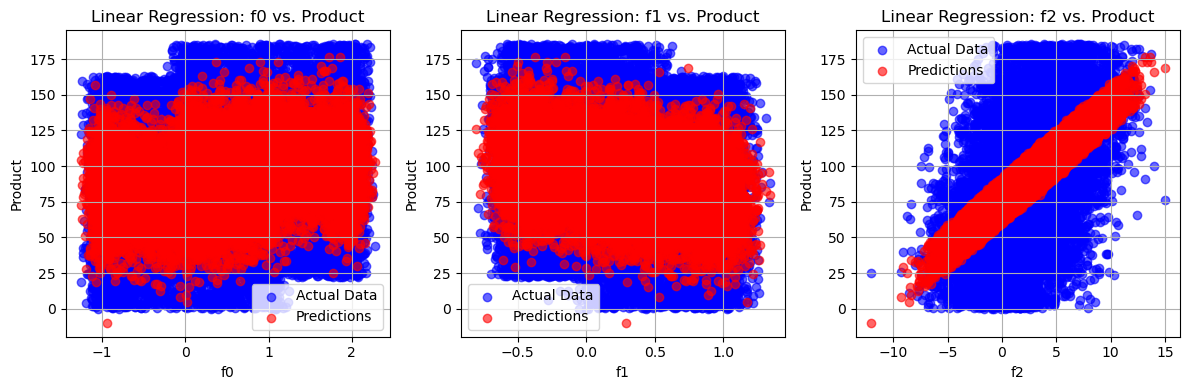

The root mean square error of the model is: 37.65063757119425
The average of the oil volume on the region is: 92.5
30532.829603829305


In [33]:
rmse_0,oil_mean_0,wells_200_0,tvalid_0,pvalid_0 = calculateRMSE(region_0)
# Show values
print(f"The root mean square error of the model is: {rmse_0}")
print(f"The average of the oil volume on the region is: {round(oil_mean_0,2)}")
print(wells_200_0.sum())

We can observe that out f2 graphic is a way better indicator than the other 2 graphics since it is very predictable that whenever f2 score rises, the volume generated does too.

### Region 1 analysis

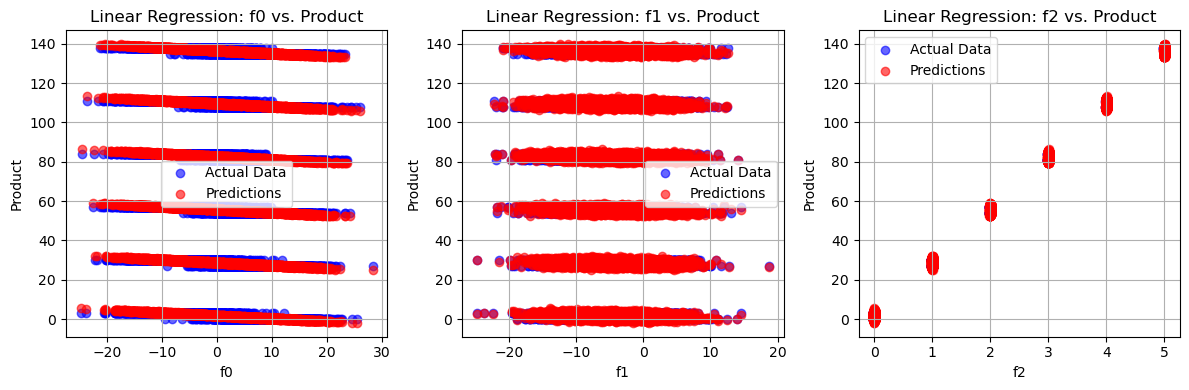

The root mean square error of the model is: 0.8908426254553109
The average of the oil volume on the region is: 68.83


In [34]:
rmse_1,oil_mean_1,wells_200_1,tvalid_1,pvalid_1 = calculateRMSE(region_1)
# Show values
print(f"The root mean square error of the model is: {rmse_1}")
print(f"The average of the oil volume on the region is: {round(oil_mean_1,2)}")

This graphics explain a different story than the previous one, the "product" values of this region seems to be rounded into specific values, so we do not have the noise than in other regions. Although the f0 and f1 graphics doesn't seem to be valuable since they appear to get the same amount of volume no matter the score of the feature, we can see how f2 is still an indicator of growth in volume.

On further investigation, we can see how the product values of the region 1 are repreated extensively into the data, there are only 12 values on the product column.

In [35]:
region_1["product"].value_counts()

product
53.906522     8472
26.953261     8468
84.038886     8431
57.085625     8390
3.179103      8337
80.859783     8320
30.132364     8306
134.766305    8304
110.992147    8303
0.000000      8235
137.945408    8233
107.813044    8201
Name: count, dtype: int64

### Region 2 analysis

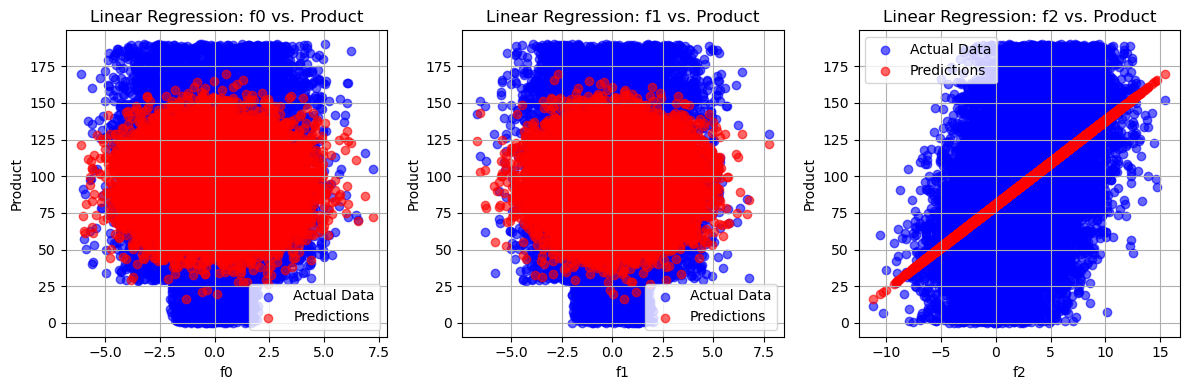

The root mean square error of the model is: 40.157688186301726
The average of the oil volume on the region is: 95.0


In [36]:
rmse_2,oil_mean_2,wells_200_2,tvalid_2,pvalid_2 = calculateRMSE(region_2)
# Show values
print(f"The root mean square error of the model is: {rmse_2}")
print(f"The average of the oil volume on the region is: {round(oil_mean_2,2)}")

The spreadness of the graphics f0 and f1 are interesting since it seems to be a certain number on the indicators for the scores, that in between the -2.5 and 2.5 are all the values and further or in the opposite direction there is no values captured.

The values found on the graphics f0 and f1 are interesting since the are agglomerated on the center and and do nos spread on the range of -5 and 5.

On the other side our f2 indicator seems to be very sharp on predictions since there are alot of the values concentrated into a shor space of the graphic, which means they are predictable values to rely on since there is a tendency on the volume it grows when the score goes up too.

### Conclusion on the region analysis

Seeing the results of making a graphic about the three columns, we can conclude the next points:

* Due to the nature of graphics f0 and f1, we can observe that because the values are spread, our prediction fails to predict all the spectrum of the scores. Meanwhile on f2 graphic we can observe that our values are more adjusted and closer, so the regression line forms because it is more predictable than the other ones.

* Column f2 seems to be a very reliable score that shows always a direction on where the data goes if the value changes.

## Income, Investment and How much to not get red numbers

Since the Investment is 100 million for 200 oil wells. We need to take into consideration  the next train of thought:

* 100 million dollars are going to be spent on the project for 200 wells to be built
* Which means 100 million divided by 200 is equal to $500,000 dollars worth for each well to produce

If we were to calculte how many liters of oil one well needs to generate, we would need to consider the price of every liter which is $4.5 dollars

* We divide the total cost of a single well between how many liters is worth
    
    500000 of investment divided by 4.5 that is the price of the liter of oil

* Which result in 111.1 volume units per well to get the company's investment back

Which we conclude that, the wells that are going to be built, need to produce 111.1 units, per well minimum. To earn the benefits of the product we would need to have wells that can perform higher than 111.1 units. 



In [37]:
# We can develop a function that allows us to see how much
# income a well can make knowing their unit volume
def income_by_all_region_wells(wells_200_region, region_number):
    # Set the cost of a single well to build
    well_cost = 500000
    # Set the price for every liter
    price_per_liter = 4.5
    # Summatory of all units of every well
    total_units_per_region = wells_200_region.sum()
    # Price of the total of units of the region
    total_possible_income = total_units_per_region * price_per_liter * 1000
    # Returns the income minus the cost of the 200 wells to get the net profit
    total_net_profit = total_possible_income - (well_cost * len(wells_200_region))
    print(f"The net profit of the best 200 wells for region {region_number} is: {total_net_profit}")
    print(f"The average unit per well is: {total_units_per_region/200}")
    print()
    return total_net_profit

In [38]:
total_net_profit_0 = income_by_all_region_wells(wells_200_0,0)
total_net_profit_1 = income_by_all_region_wells(wells_200_1,1)
total_net_profit_2 = income_by_all_region_wells(wells_200_2,2)

The net profit of the best 200 wells for region 0 is: 37397733.21723187
The average unit per well is: 152.66414801914652

The net profit of the best 200 wells for region 1 is: 24804712.81306635
The average unit per well is: 138.67190312562926

The net profit of the best 200 wells for region 2 is: 32702666.190574706
The average unit per well is: 147.44740687841633



### Conclusion of region analysis

Looking at the results given, and looking at the RMSE and the average of oil a well gives per region. I would suggest to choose region 0, because of the following points:

* Region 0 despite being the 2nd region with the lowest RMSE, its indicators tend to be more predictable than region 1 or 2.

* Region 0 also has a high average volume of units per well which is 92.5. And if the conditions are met correctly, this is the region where we can take the most of our profitability.

## Bootstrapping
For this section we are going to validate using the Bootstrapping technique with our top 200 wells for every region to see from which region we can benefit the most.

In [1]:
def bootstrapping(target_valid, predictions, n_iterations=1000, sample_size=500, best_points=200):
    revenues = []
    revenue_per_barrel = 4.5
    revenue_per_unit = revenue_per_barrel * 1000
    well_cost = 500000

    for i in range(n_iterations):
        # Select the previous 500 points (with replacement) to simulate exploration
        sampled_indices = pd.Series(range(len(predictions))).sample(n=sample_size, replace=True)
        sample_predictions = pd.Series(predictions).iloc[sampled_indices].reset_index(drop=True)
        sample_target = pd.Series(target_valid).iloc[sampled_indices].reset_index(drop=True)

        # We sort the predictions and select the 200 best ones
        best_indices = sample_predictions.nlargest(best_points).index
        selected_targets = sample_target.iloc[best_indices]

        # We calculate the earnings for the 200 best selected points
        revenue = selected_targets.sum() * revenue_per_unit - best_points * well_cost
        revenues.append(revenue)

    revenues_df = pd.Series(revenues)
    mean_profit = revenues_df.mean()
    lower_quantile = round(revenues_df.quantile(0.025), 4)
    upper_quantile = round(revenues_df.quantile(0.975), 4)

    # Plot Bootstrap Distribution with Confidence Interval
    plt.figure(figsize=(10, 6))
    plt.hist(revenues_df, bins=30, color="blue", alpha=0.7, edgecolor="black")

    # Highlight confidence interval
    plt.axvline(lower_quantile, color="red", linestyle="dashed", linewidth=2, label=f"2.5%: {lower_quantile:,.2f}")
    plt.axvline(upper_quantile, color="red", linestyle="dashed", linewidth=2, label=f"97.5%: {upper_quantile:,.2f}")

    # Labels & Title
    plt.xlabel("Bootstrapped Means")
    plt.ylabel("Frequency")
    plt.title("Bootstrap Distribution with 95% Confidence Interval")
    plt.legend()
    plt.grid(True)

    # Show Plot
    plt.show()

    confidence_interval = [lower_quantile, upper_quantile]
    loss_risk = (revenues_df < 0).mean() * 100
    return revenues_df, mean_profit, confidence_interval, loss_risk

### Region 0

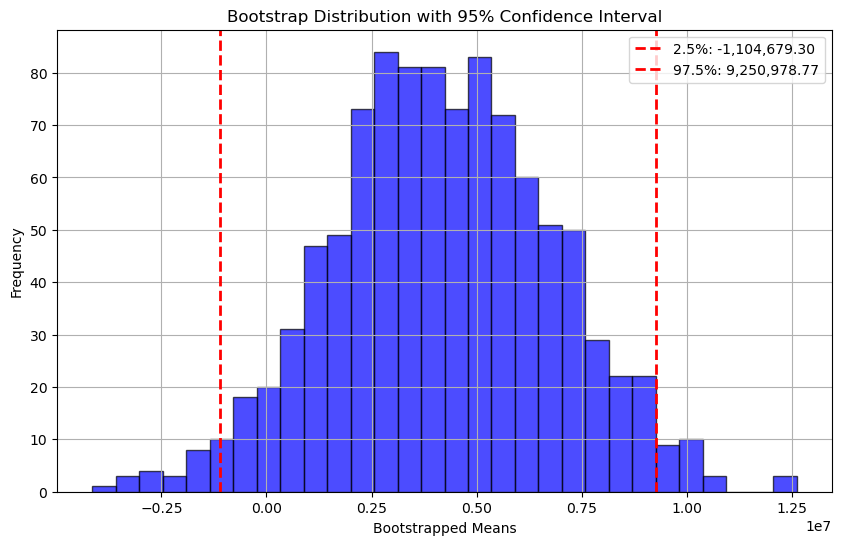

The mean profit for region 0 is: 4185309.668386667
The Risk loss of the region 0 is:  5.6000000000000005%


In [ ]:
revenues_df_0, mean_profit_0, confidence_interval_0, loss_risk_0 = bootstrapping(tvalid_0,pvalid_0)

print(f"The mean profit for region 0 is: {mean_profit_0}")
print(f"The Risk loss of the region 0 is:  {loss_risk_0}%")

### Region 1

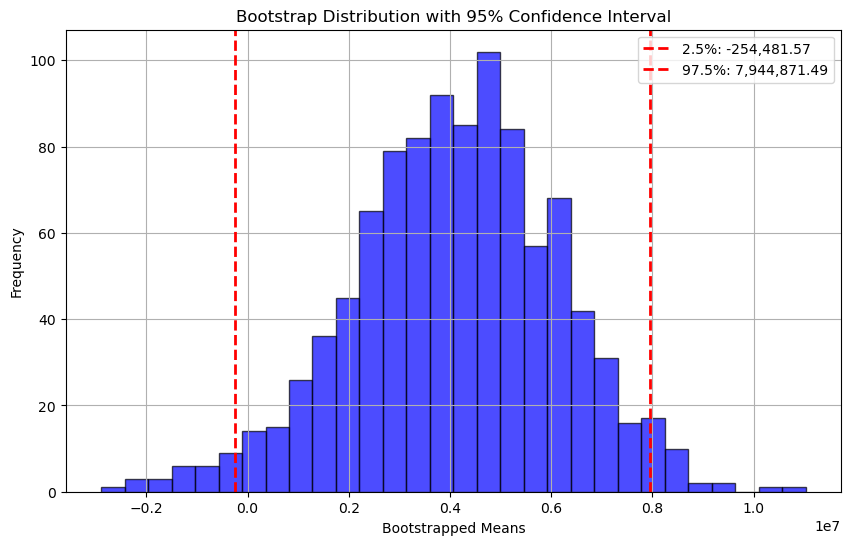

The mean profit for region 1 is: 4100807.352855233
The Risk loss of the region 1 is:  2.8000000000000003%


In [77]:
revenues_df_1, mean_profit_1, confidence_interval_1, loss_risk_1 = bootstrapping(tvalid_1,pvalid_1)

print(f"The mean profit for region 1 is: {mean_profit_1}")
print(f"The Risk loss of the region 1 is:  {loss_risk_1}%")

### Region 2

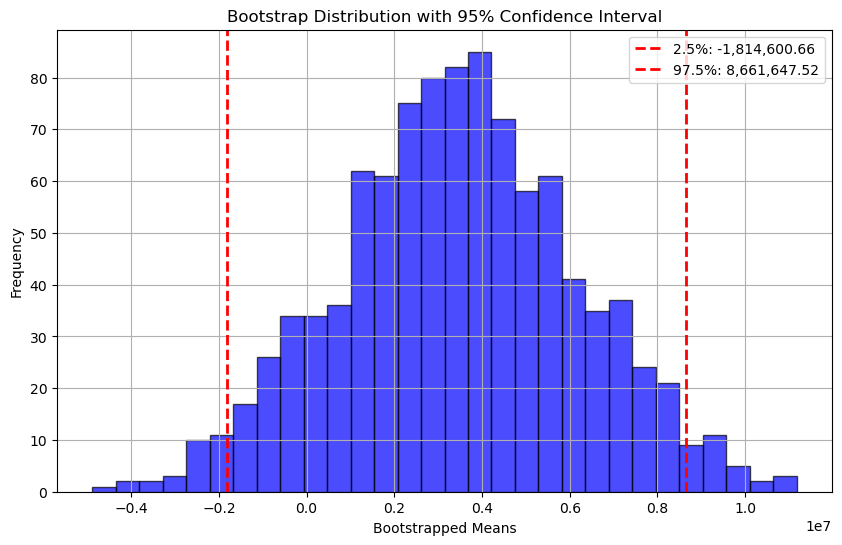

The mean profit for region 0 is: 3452436.883389654
The Risk loss of the region 0 is:  11.0%


In [78]:
revenues_df_2, mean_profit_2, confidence_interval_2, loss_risk_2 = bootstrapping(tvalid_2,pvalid_2)

print(f"The mean profit for region 0 is: {mean_profit_2}")
print(f"The Risk loss of the region 0 is:  {loss_risk_2}%")

# Conclusion of the analysis
To conclude this analysis, we can say the following points:

* Region 0 has the best profitability for the whole analysis. Following Region 1, it becomes the 2nd best in net profit of the regions. Lastly, region 2 is less profitable than any other region on the analysis we made watching the bootstrapping technique.

* We can also say that the risk of loss is lead by Region 1, being almost half the risk of region 0 who has the best profits, and overperforming region 2 by more than half the percentage.

Finishing the analysis, I am certain that the best possible option for the company is to choose region 1. Due to it's high profitability and its very low risk of loss, I would suggest the company to follow the data and make a decistion based on this numbers in order to build the wells and take the greatest and safest approach for the profit it will make.
